       reg_code              region_name    road_code                                                                                        road_name                                                    road_type                                                                     address    crash_type_name  crash_date crash_time                                                                                                                                                          crash_reason  fatalities_amount  victims_amount  vehicles_amount  participants_amount            datetime crash_date_day   wait_time
39075        86       Республика Карелия        А-121                       "Сортавала" Санкт-Петербург - Сортавала - автомобильная дорога Р-21 "Кола"                        Федеральная дорога общего пользования                  СЗФО, Республика Карелия, Лахденпохский район, Лахденпохья  Наезд на пешехода    20180401    3:20:00                                                       

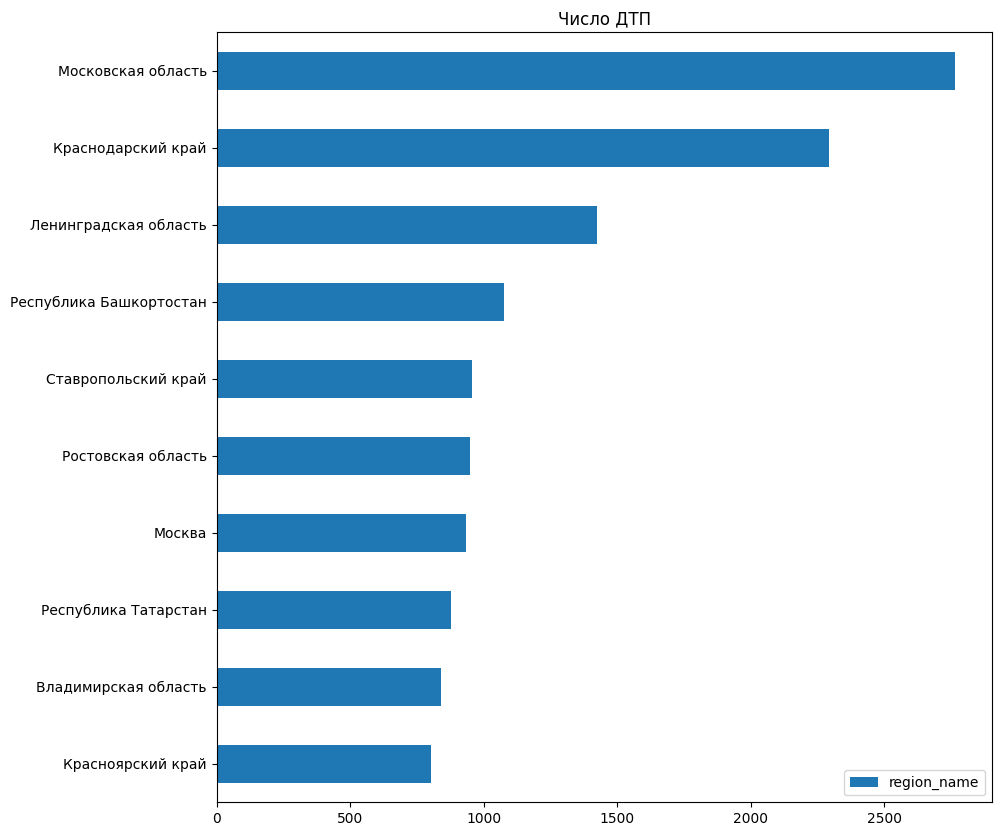

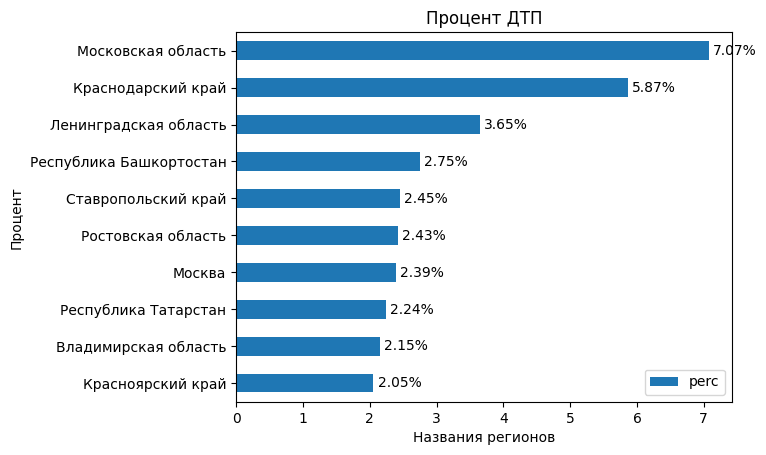

In [7]:
#Поставим задачу: для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети необходимо исследовать и подготовить данные по вопросам:
# 1) Найти регионы с наибольшей аварийностью.
# 2) Определить распределение числа ДТП по типам дорог, по видам ДТП.
# 3) Исследовать зависимость числа ДТП от дня недели.
# 4) Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.
# 5) Исследовать время ожидания сотрудников ДПС.
# 6) Исследовать число участников ДТП.
# 7) Исследовать ДТП в ночное время суток.
# 8) Определить наиболее опасные дороги.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Найти регионы с наибольшей аварийностью
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

data = pd.read_excel('dtp_good.xlsx')
print(data.tail(10))
data.info()
data.shape
#всего случаев ДТП 39085

dtp_count = data['region_name'].value_counts().sort_values(ascending=True)

dtp_count.tail(10).plot(kind='barh',
                        figsize=(10,10),
                        title='Число ДТП',
                        legend=True
                       )

dtp_count = data['region_name'].value_counts().sort_values(ascending=True).reset_index()
dtp_count.columns = ['region_name', 'dtp_count']
dtp_count['perc'] = (dtp_count['dtp_count']/dtp_count['dtp_count'].sum())*100

ax = dtp_count.tail(10).plot(kind = 'barh',
                             title ='Процент ДТП',
                             legend = True,
                             x ='region_name',
                             xlabel ='Названия регионов',
                             y='perc',
                             ylabel='Процент')

ax.bar_label(ax.containers[0], fmt='%.2f%%',padding=3)
#Получается, что лидирует Московская область, а вовсе не Москва или СПб
plt.show()

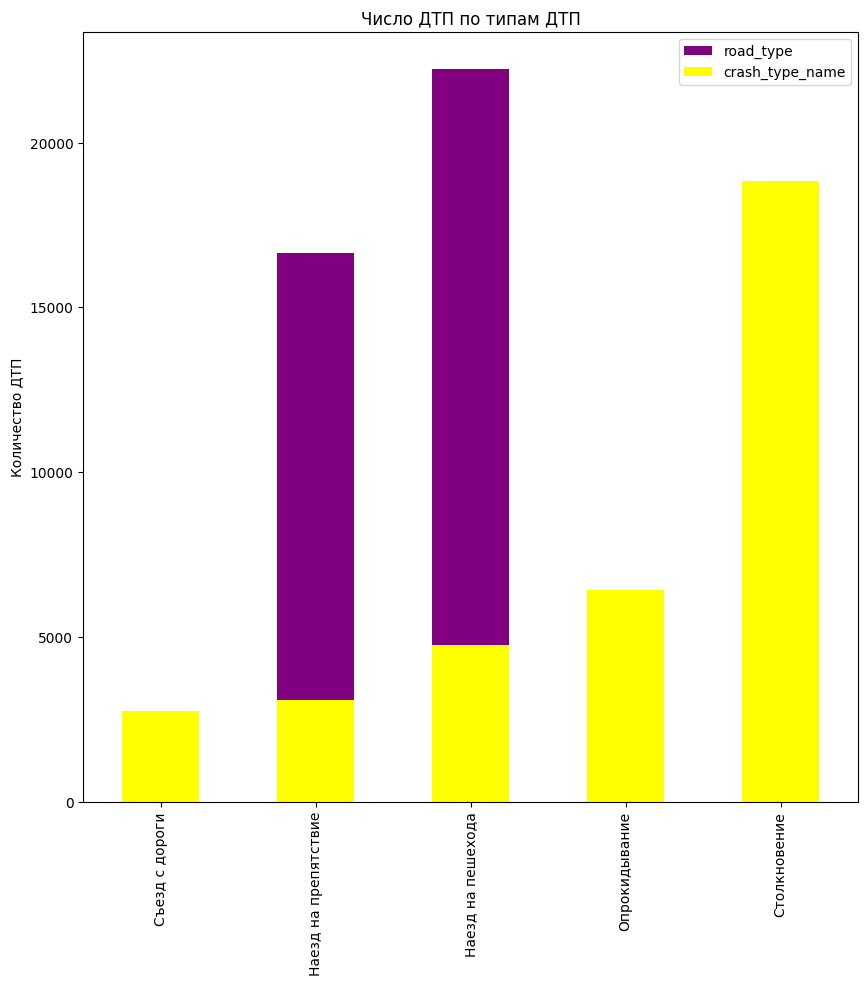

In [8]:
# 2) Определить распределение числа ДТП по типам дорог, по видам ДТП
# Построим столбчатую диаграмму числа ДТП по типам дорог
dtp_road_count = data['road_type'].value_counts().sort_values(ascending=True)
dtp_road_count
dtp = dtp_road_count.plot(kind='bar',
                        figsize=(10,10),
                        title='Число ДТП по типам дорог',
                        legend=True,
                        y='road_type',
                        ylabel='Количество ДТП',
                        color='purple')

# Построим столбчатую диаграмму числа ДТП по видам ДТП, оставим топ-5
dtp_crash_type_name = data['crash_type_name'].value_counts().sort_values(ascending=True)
dtp_crash_type_name
dtp = dtp_crash_type_name.tail(5).plot(kind='bar',
                        figsize=(10,10),
                        title='Число ДТП по типам ДТП',
                        legend=True,
                        y='crash_type_name',
                        ylabel='Количество ДТП',
                        color='yellow')
plt.show()

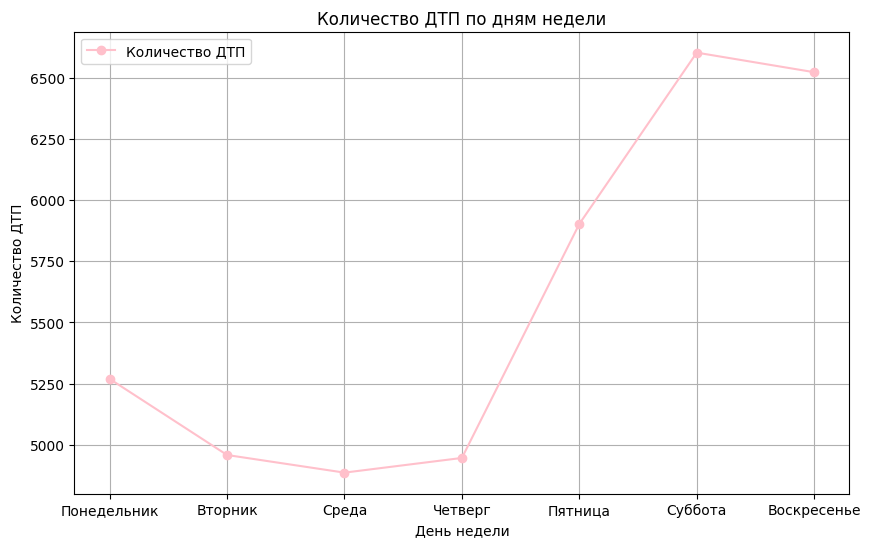

In [9]:
# 3) Исследовать зависимость числа ДТП от дня недели
crashes_by_day = data['crash_date_day'].value_counts().loc[['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']]
crashes_by_day_df = pd.DataFrame(crashes_by_day)
crashes_by_day_df.index = ['Понедельник','Вторник','Среда','Четверг','Пятница','Суббота','Воскресенье']
crashes_by_day_df.columns = ['Количество ДТП']
crashes_by_day_df.plot(kind='line', figsize=(10,6), grid=True, style='o-', color='pink', title= 'Количество ДТП по дням недели', ylabel='Количество ДТП', xlabel='День недели')
#чаще всего ДТП происходят в субботу, реже - в среду
plt.show()

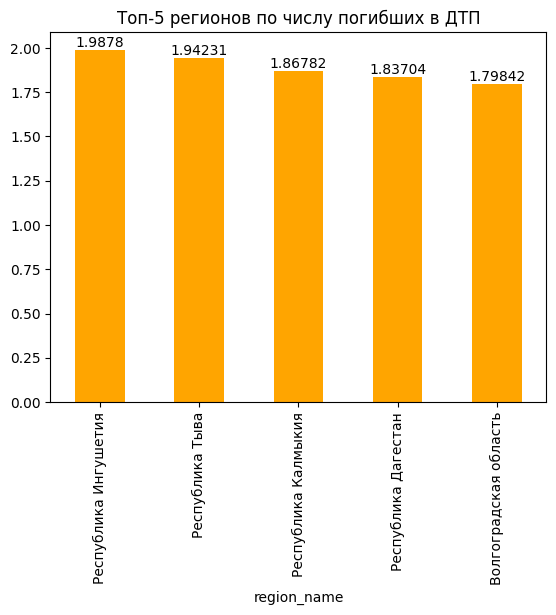

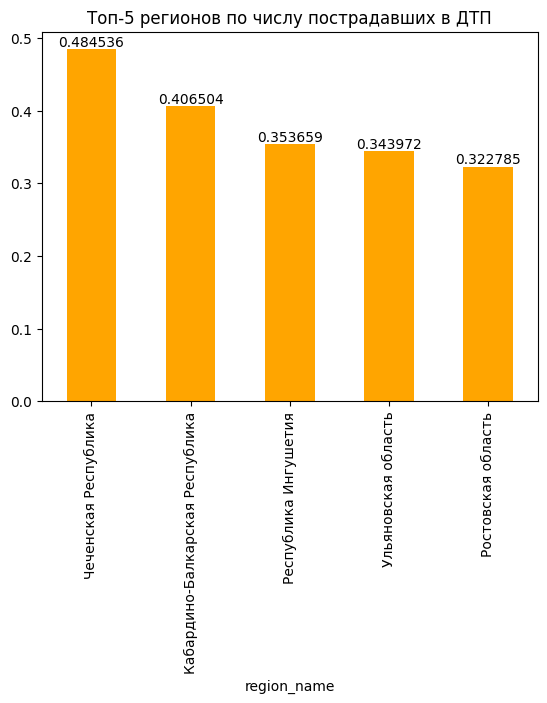

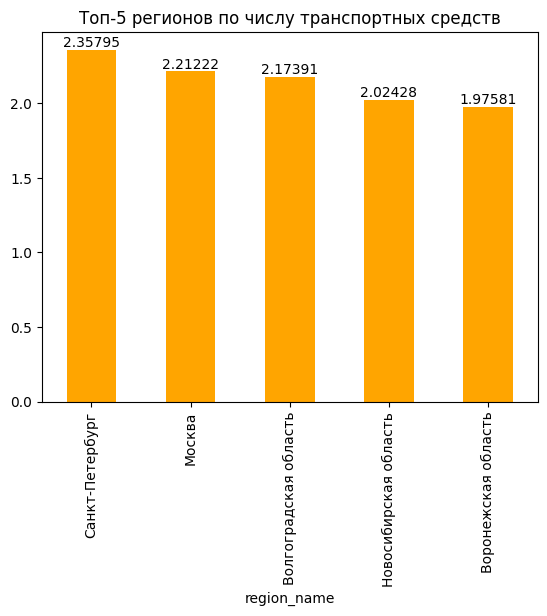

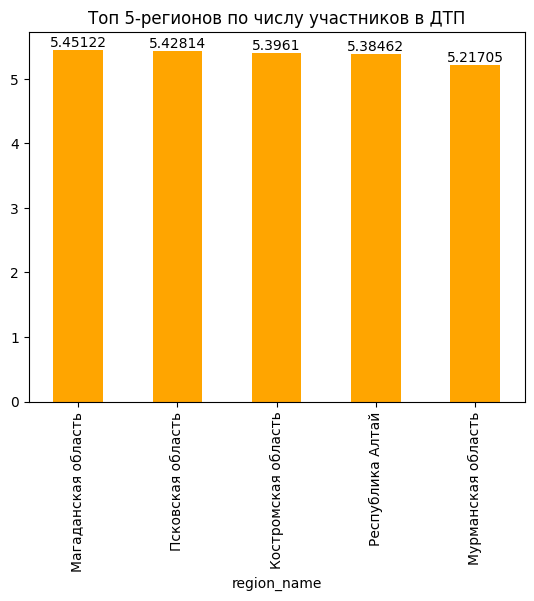

In [10]:
# 4) Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП
srednee_znach = data.groupby(['region_name'])[['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']].mean()
zagolovki = {'fatalities_amount': 'Топ-5 регионов по числу погибших в ДТП',
            'victims_amount': 'Топ-5 регионов по числу пострадавших в ДТП',
            'vehicles_amount': 'Топ-5 регионов по числу транспортных средств',
            'participants_amount': 'Топ 5-регионов по числу участников в ДТП'}
#создали словарь, присвоили заголовки
new = ['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']
for column in new:
    sorted = srednee_znach.sort_values(by=column, ascending=False) # Сортировка идет по убыванию, задали False
    title = zagolovki[column] #Теперь появятся заголовки
    ax = sorted[column].head(5).plot(kind='bar', x='region_name', title = title, color = 'orange')
    ax.bar_label(ax.containers[0])
    plt.show()

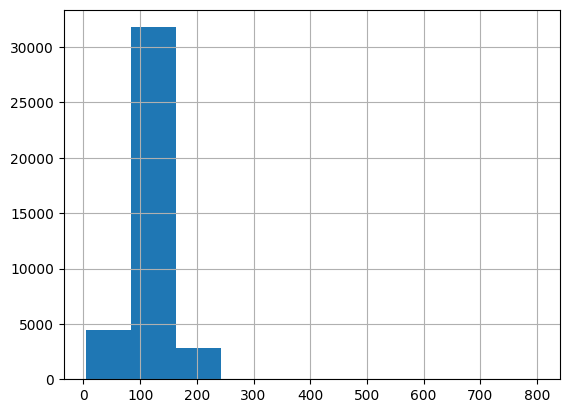

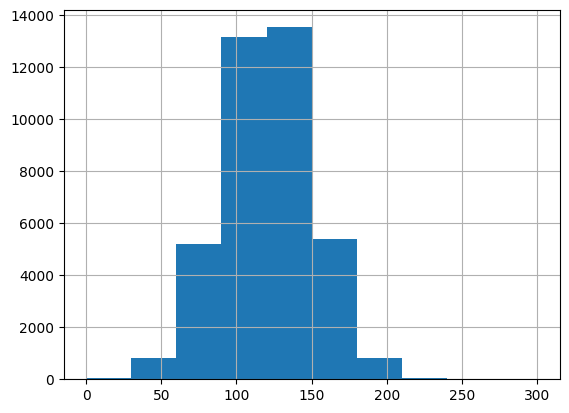

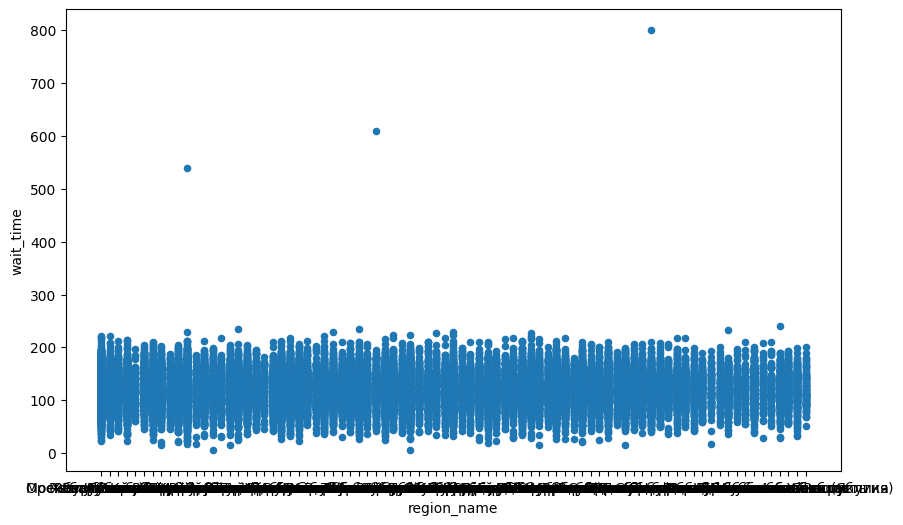

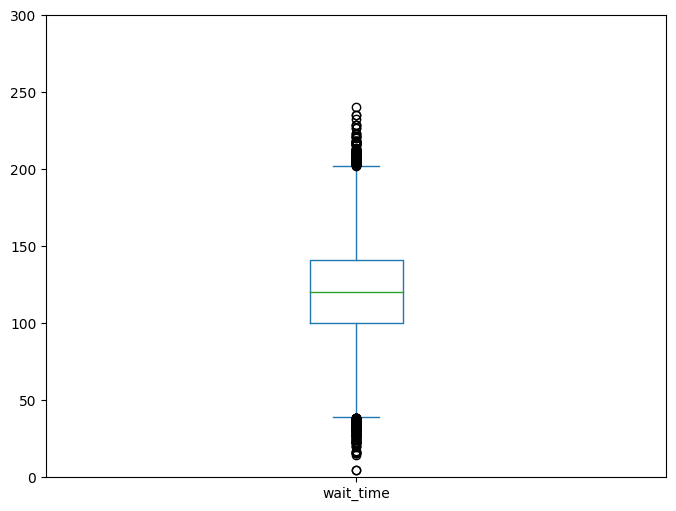

201.9801186935365 38.823726829941734
Число выбросов: 259
259


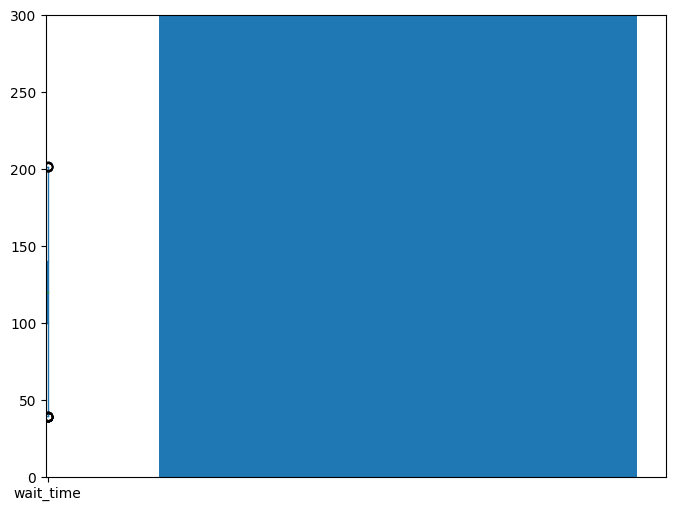

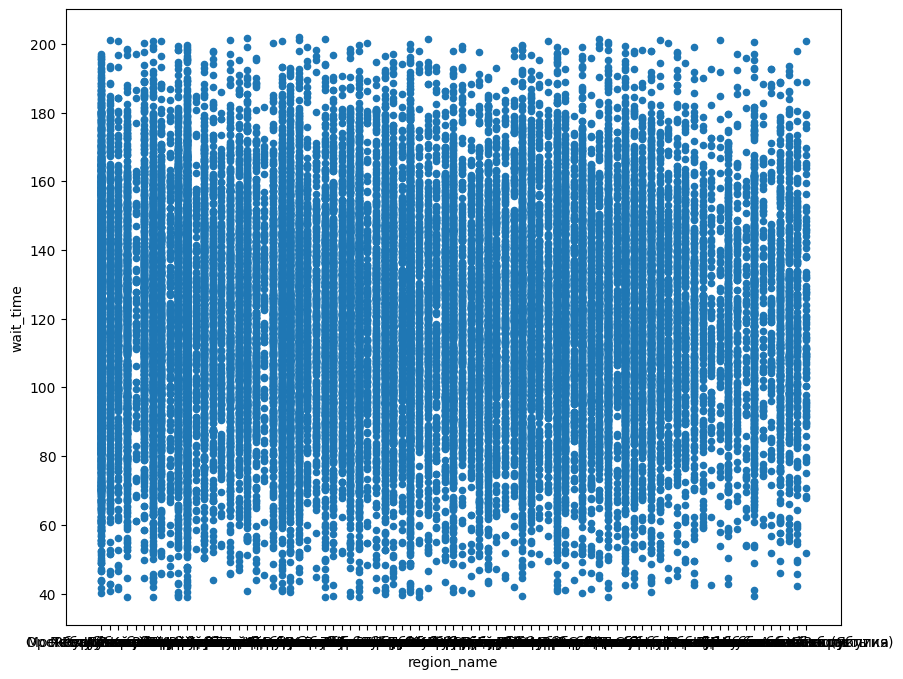

In [11]:
# 5) Исследовать время ожидания сотрудников ДПС
data['wait_time'].hist() #Построим гистограмму времени ожидания ДПС
plt.show()
#из гистограммы видно, что чаще всего людям приходится ждать от 80 до 160 минут (таких случаев больше 30 тысяч)
data['wait_time'].hist(range=(0, 300))
plt.show()
# Гистограмма похожа на нормальное распределение, теперь это лучше видно. На первой гистограмме мы видели ось вплоть до 800 значений, но не видели значений. Возможно, присутствуют единичные значения в указанном диапазоне.
# Построим другой график - точечную диаграмму
data.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 6))
plt.show()
# заметно, что есть единичные случаи, когда время ожидания составляло и 800 минут, точечная диаграмма позволяет это увидеть

#Построим boxplot для времени ожидания
data['wait_time'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 300)
                      )
plt.show()
data['wait_time'].describe()
q75 = np.percentile(data['wait_time'], 75)
q25 = np.percentile(data['wait_time'], 25)
iqr = q75 - q25
ejection_h = q75 + iqr * 1.5
ejection_l = q25 - iqr * 1.5
print (ejection_h, ejection_l)
# Определим число выбросов
n_ejection = data['wait_time'][(data['wait_time'] > ejection_h) | (data['wait_time'] < ejection_l)].count()
print('Число выбросов:', n_ejection)
# Число выбросов: 259
# сделаем функцию
def ejection (col):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = data[col][(data[col] > ejection_h) | (data[col] < ejection_l)].count()
    ejection_perc = (ejection_count / len(data)) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)
ejection('wait_time')
# Теперь мы знаем все значения, число элементов и процент значений в датасете
# Выше мы нашли число выбросов, перевернем условия, чтобы отфильтровать датасет без них
good_data_wait_time = data[(data['wait_time'] < ejection('wait_time')[0]) & (data['wait_time'] > ejection('wait_time')[1])]
good_data_wait_time = good_data_wait_time.reset_index(drop=True)
good_data_wait_time.head(3)
#Проверка лишней не бывает
print (len(data) - len(good_data_wait_time))
# проверим, что изменилось на графиках
good_data_wait_time['wait_time'].hist()
# проверим describe
good_data_wait_time['wait_time'].describe()
# построим box
good_data_wait_time['wait_time'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 300)
                      )
plt.show()
# построим scatter
good_data_wait_time.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 8))
plt.show()
#Выбросы по признаку времени ожидания устранены
# Данные готовы для проведения статистического анализа и/или построения модели прогноза времени ожидания сотрудников ДПС.

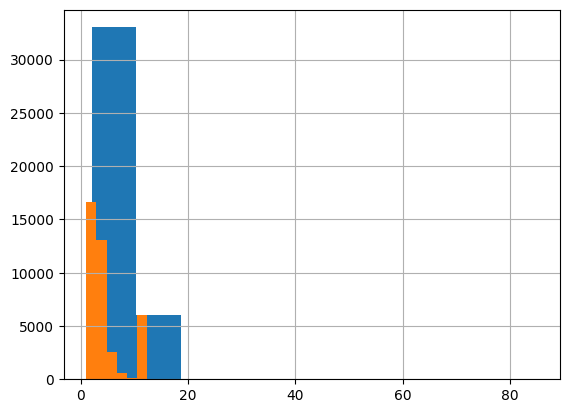

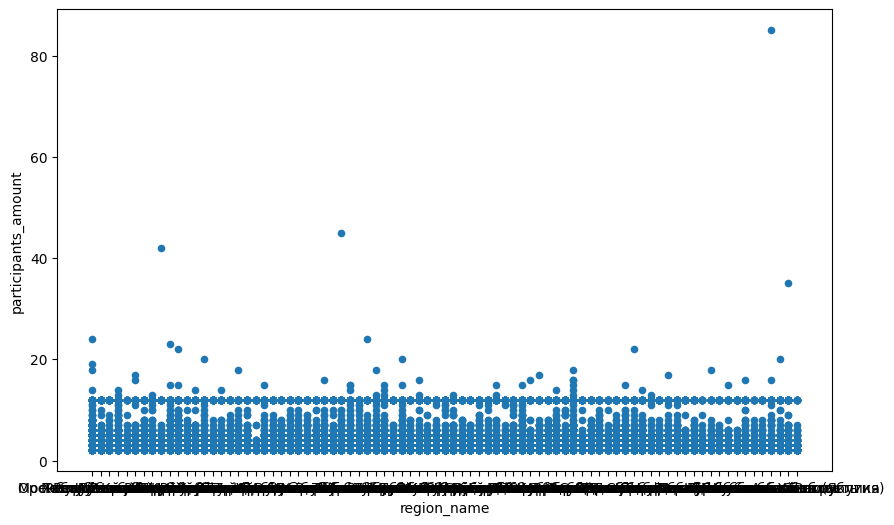

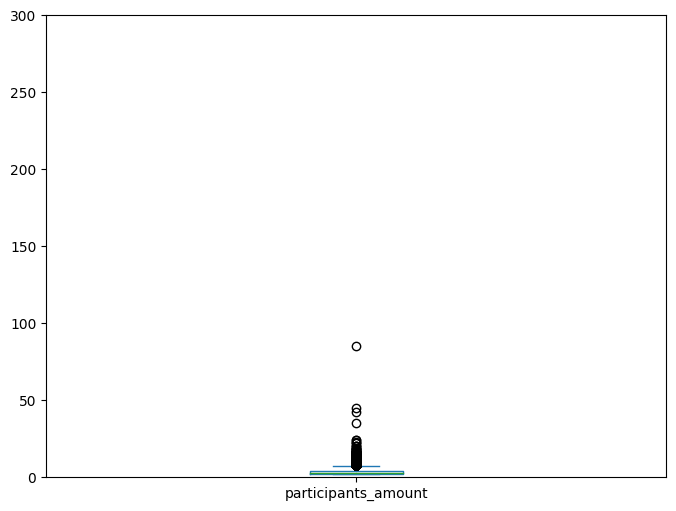

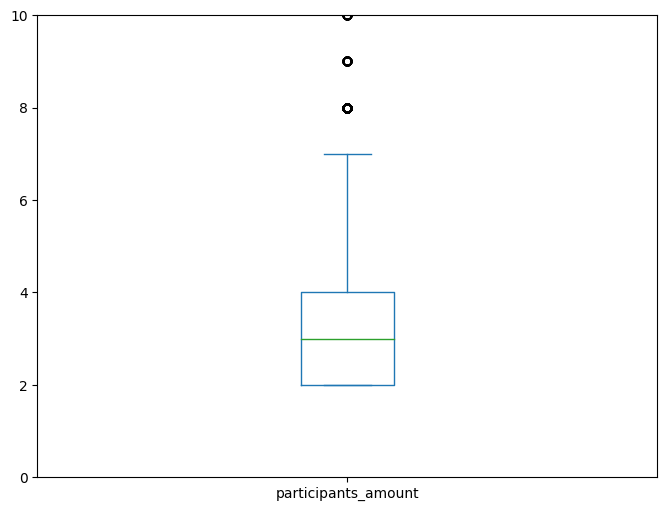

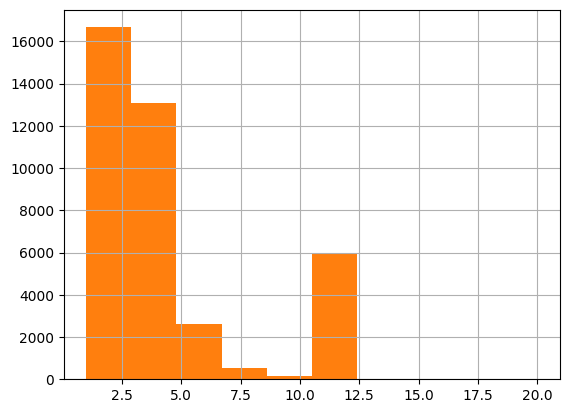

In [12]:
# 6) Исследовать число участников ДТП
# построим гистограмму 'participants_amount'
data['participants_amount'].hist()
# Большую часть составляет количество участников до 10
data['participants_amount'].hist(range=(1, 20))
# Большую часть составляет число участников, примерно равное трем
# Построим точечную диаграмму
data.plot(kind='scatter',
          y='participants_amount',
          x='region_name',
          figsize=(10, 6))
plt.show()
data['participants_amount'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 300)
                      )
plt.show()
data['participants_amount'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 10)
                      )
plt.show()
# Теперь хорошо виден сам ящик. Какие выводы мы можем сделать?
# Медиана = 3
# 25-й перцентиль = 2
# 75-й перцентиль = 4
# IQR = 2
# Выбросы > 7
data['participants_amount'].describe() #нет нижнего уса
ejection('participants_amount')
# Найдем число записей при более высоком значение percentile()
# Первым шагом определим границу значений, при percentile = 95.
# Запишем значение в переменную
participants_amount_ejection_h = np.percentile(data['participants_amount'], 95)
participants_amount_ejection_h
# Определим число выбросов
participants_amount_count = data['participants_amount'][(data['participants_amount'] > participants_amount_ejection_h)].count()
participants_amount_count
# Определим процент выбросов
participants_amount_perc = (participants_amount_count / len(data)) * 100
# Вернемся к гистограмме
data['participants_amount'].hist(range=(1, 20))
# удалим 'экстремальные' выбросы (перезапишем датасет).
# нужно искать ответ на вопрос почему значения в таком объеме равны 12, хотя значения 11 и 13 представлены единичными случаями

# убираем выбросы
new_data = data[(data['participants_amount'] < participants_amount_ejection_h)]
new_data = good_data_wait_time.reset_index(drop=True)
good_data_wait_time.head(3)
#ищем ответ на вопрос - поднимем границу
q95 = np.percentile(data['participants_amount'], 95)
q5 = np.percentile(data['participants_amount'], 5)
iqr = q95 - q5
participants_amount_ejection_h = q95 + iqr * 1.5
participants_amount_ejection_h

participants_amount_count = data['participants_amount'][(data['participants_amount'] > participants_amount_ejection_h)].count()
participants_amount_count
participants_amount_perc = (participants_amount_count / len(data)) * 100
data['participants_amount'].hist(range=(1, 20))
one_more_data = data[(data['participants_amount'] < participants_amount_ejection_h)]
one_more_data = good_data_wait_time.reset_index(drop=True)


Процент ДТП, произошедших в ночное время суток: 12.26%


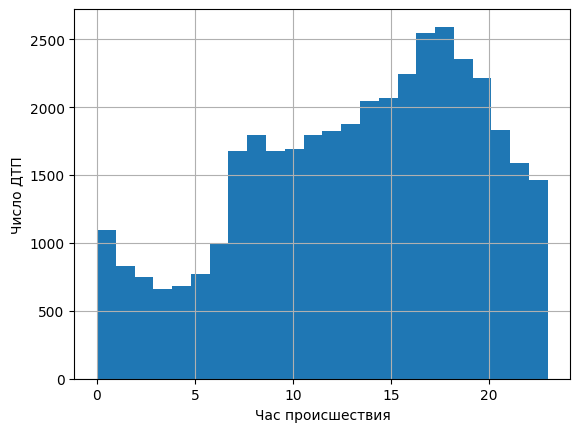

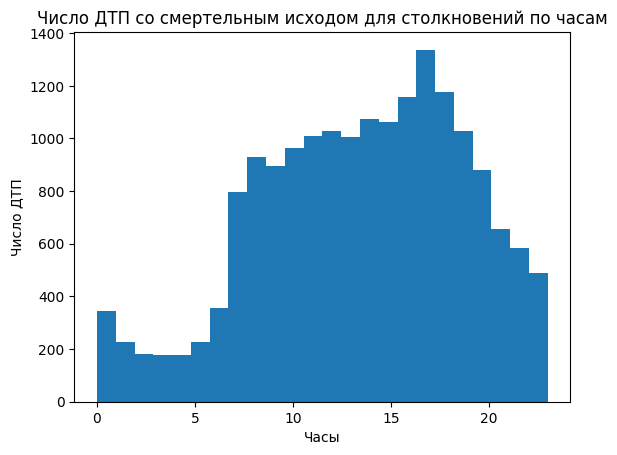

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,hour
137,3,Краснодарский край,отсутствует,г.Краснодар - г.Ейск,Региональная или межмуниципальная дорога общего пользования,"ЮФО, Краснодарский край, Краснодар, Прикубанский",Столкновение,20181230,23:31:00,Неправильный выбор дистанции,1,0,2,3,2018-12-30 23:31:00,Воскресенье,159.831639,23
138,53,Оренбургская область,53К-2801000,Бугульма - Бугуруслан - Бузулук - Уральск,Региональная или межмуниципальная дорога общего пользования,"ПФО, Оренбургская область, Северный район",Столкновение,20181230,23:00:00,Выезд на полосу встречного движения,1,1,2,2,2018-12-30 23:00:00,Воскресенье,76.299780,23
139,29,Калужская область,отсутствует,Оптина Пустынь - Нижние Прыски,Региональная или межмуниципальная дорога общего пользования,"ЦФО, Калужская область, Козельский район, Козельск",Наезд на пешехода,20181230,22:55:00,Нахождение на проезжей части без цели её перехода,1,0,1,2,2018-12-30 22:55:00,Воскресенье,82.794800,22
140,85,Республика Калмыкия,отсутствует,Яшкуль-Комсомольский-Артезиан,Региональная или межмуниципальная дорога общего пользования,"ЮФО, Республика Калмыкия, Яшкульский район",Столкновение,20181230,22:35:00,Выезд на полосу встречного движения,2,0,2,6,2018-12-30 22:35:00,Воскресенье,152.464663,22
143,29,Калужская область,отсутствует,М-3 Украина - Перемышль,Региональная или межмуниципальная дорога общего пользования,"ЦФО, Калужская область, Перемышльский район",Наезд на пешехода,20181230,21:40:00,"Ходьба вдоль проезжей части попутного направления вне населенного пункта при удовлетворительном состоянии обочины, Другие нарушения ПДД водителями",1,0,1,2,2018-12-30 21:40:00,Воскресенье,125.013624,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39078,46,Московская область,отсутствует,Куровское-Шатура-Дмитровский Погост-Самойлиха,Региональная или межмуниципальная дорога общего пользования,"ЦФО, Московская область, Орехово-Зуевский район",Столкновение,20180401,2:40:00,Несоблюдение очередности проезда,1,0,2,4,2018-04-01 02:40:00,Воскресенье,88.439693,2
39080,80,Республика Башкортостан,80Н-069,Аскарово - Альмухаметово - Сибай,Региональная или межмуниципальная дорога общего пользования,"ПФО, Республика Башкортостан, Абзелиловский район, Равиловский, д Равилово",Наезд на животное,20180401,1:55:00,Нарушение правил расположения ТС на проезжей части,2,0,1,4,2018-04-01 01:55:00,Воскресенье,140.300263,1
39082,3,Краснодарский край,Р-217,Подъезд к городу Майкоп от а/д Р-217,Федеральная дорога общего пользования,"ЮФО, Краснодарский край, Новокубанский район",Столкновение,20180401,1:00:00,"Выезд на полосу встречного движения в местах, где это запрещено",2,0,2,3,2018-04-01 01:00:00,Воскресенье,106.835201,1
39083,76,Забайкальский край,А-350,Чита - Забайкальск - граница с Китайской Народной Республикой,Федеральная дорога общего пользования,"СФО, Забайкальский край, Читинский район, Новокручининский",Опрокидывание,20180401,0:30:00,Нарушение правил расположения ТС на проезжей части,3,1,1,4,2018-04-01 00:30:00,Воскресенье,110.265314,0


In [14]:
# 7) Исследовать ДТП в ночное время суток
#1 Определить число наездов на пешехода в московской области.
#2 Какой процент ДТП, составляют ДТП, произошедшие в ночное время суток (от 0 до 5 часов включительно). Построить гистограмму числа ДТП по часам
#3 Построить гистограмму числа ДТП со смертельным исходом для столкновений по часам.
#4 Используя срезы данных, сравнить число ДТП со смертельным исходом в будни (кроме пятницы), отдельно в пятницу и в выходные дни.

#1
data.query('region_name == "Московская область" and crash_type_name == "Наезд на пешехода"')
#535 cлучаев

#2
data['hour'] = data['datetime'].dt.hour
night_accidents = data.query('0 <= hour <= 5')
night_accidents_percent = len(night_accidents) / len(data) * 100
print(f'Процент ДТП, произошедших в ночное время суток: {night_accidents_percent:.2f}%')

data['hour'].hist(bins=24)
plt.xlabel('Час происшествия')
plt.ylabel('Число ДТП')
plt.show()

#3
crashes_by_hour = data.query('fatalities_amount >= 1 and crash_type_name == "Столкновение"')
hour_column = 'hour'
plt.hist(crashes_by_hour[hour_column], bins=24)
plt.xlabel('Часы')
plt.ylabel('Число ДТП')
plt.title('Число ДТП со смертельным исходом для столкновений по часам')
plt.show()

#4
data.query('fatalities_amount >= 1 and crash_date_day == "Понедельник"')
# 4717 происшествий
data.query('fatalities_amount >= 1 and crash_date_day == "Вторник"')
# 4387 происшествий
data.query('fatalities_amount >= 1 and crash_date_day == "Среда"')
# 4374 происшествий
data.query('fatalities_amount >= 1 and crash_date_day == "Четверг"')
# 4401 происшествий
#получается, что меньше всего человек погибает в ДТП в среду, а больше всего - в понедельник
data.query('fatalities_amount >= 1 and crash_date_day == "Пятница"')
# 5256 происшествий
# по сравнению с другими будними днями пятница лидирует по числу умерших в ДТП
data.query('fatalities_amount >= 1 and crash_date_day == "Суббота"')
# 5897 происшествий
data.query('fatalities_amount >= 1 and crash_date_day == "Воскресенье"')
# 5847 происшествий
# больше всего людей в ДТП погибает в субботу


In [15]:
# 8) Определить наиболее опасные дороги
# 1 Определим самую опасную дорогу в России (по числу погибших) (road_code) отдельно для двух разных типов дорог (федеральной и региональной)
# 2 Определим дорогу, которая пересекает наибольшее число регионов. не забывая исключить отсутствующий тип дороги.
# 3 Определим регион с самым опасным участком дороги для найденной дороги, построим столбчатую диаграмму по числу ДТП.

#1
federal_roads = data[data['road_type'].str.startswith('Федеральная')]
most_dangerous_federal_road = federal_roads.groupby('road_code')['fatalities_amount'].sum().idxmax()
print('Самая опасная федеральная дорога:', most_dangerous_federal_road)
# Самая опасная федеральная дорога: М-7
#1
regional_roads = data[data['road_type'].str.startswith('Региональная')]
most_dangerous_regional_road = regional_roads.groupby('road_code')['fatalities_amount'].sum().idxmax()
print('Самая опасная региональная дорога:', most_dangerous_regional_road)
# Самая опасная региональная дорога: отсутствует (код дороги отсутсвует, но это не означает того, что нет такой дороги)


Самая опасная федеральная дорога: М-7
Самая опасная региональная дорога: отсутствует
